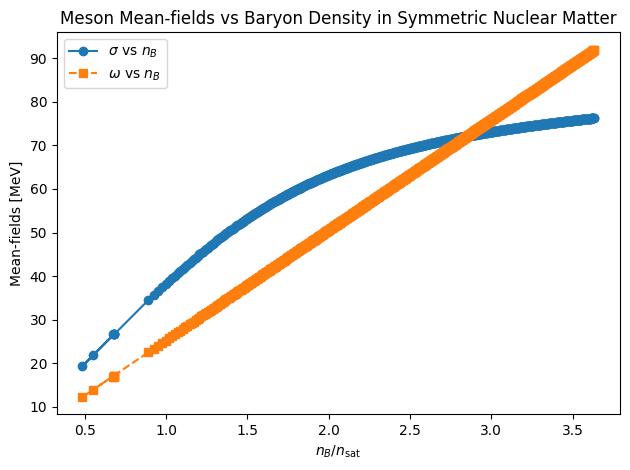

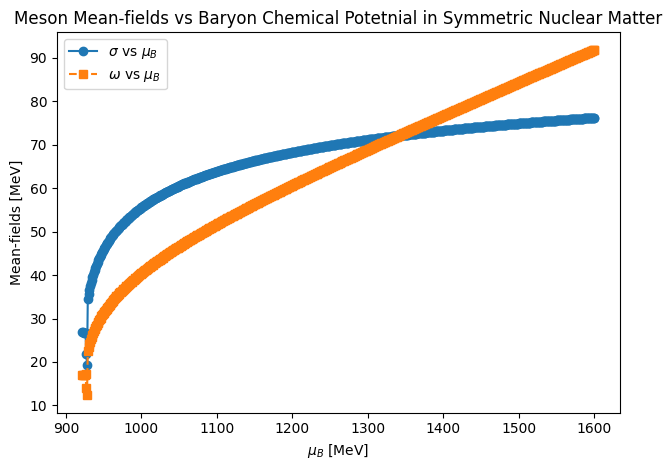

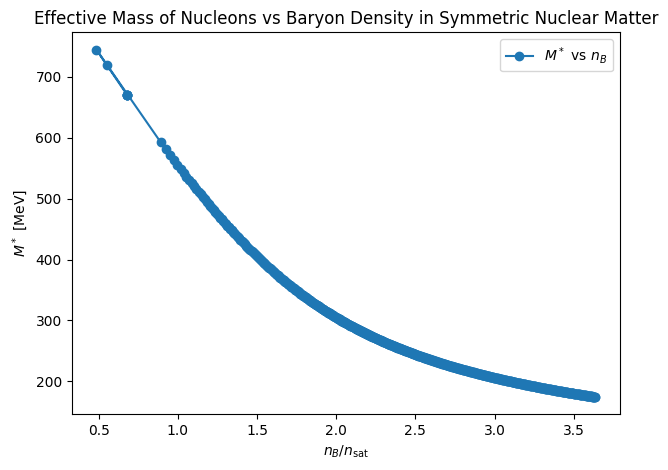

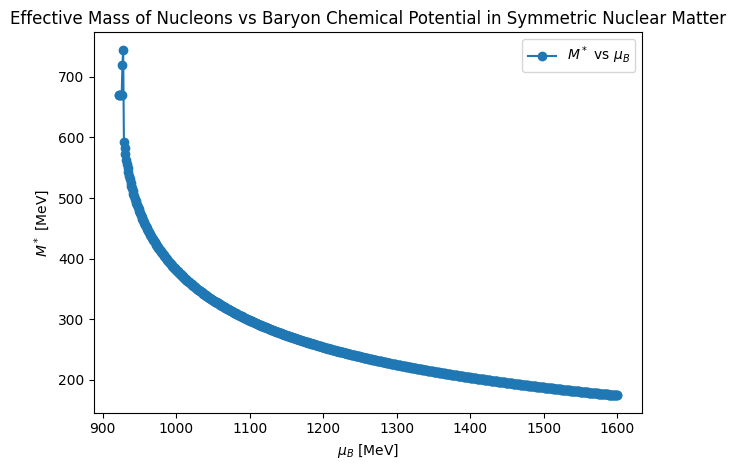

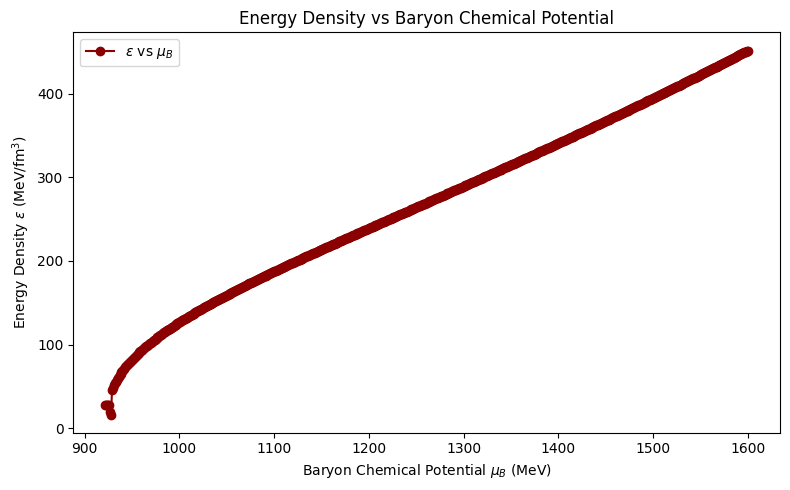

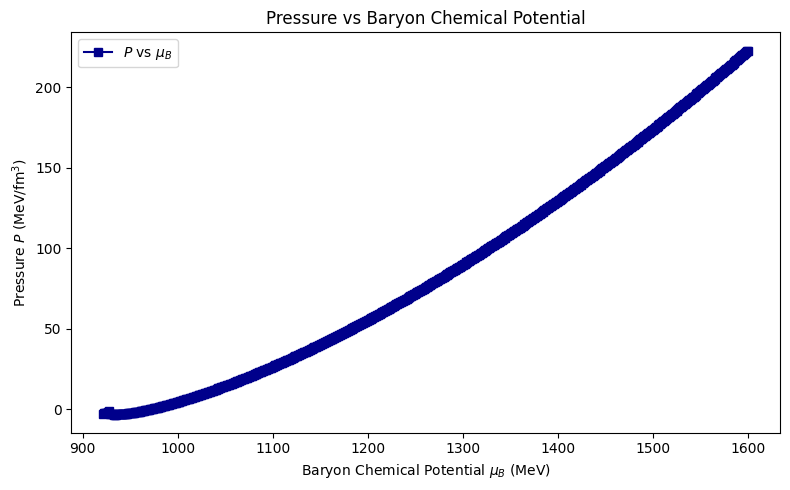

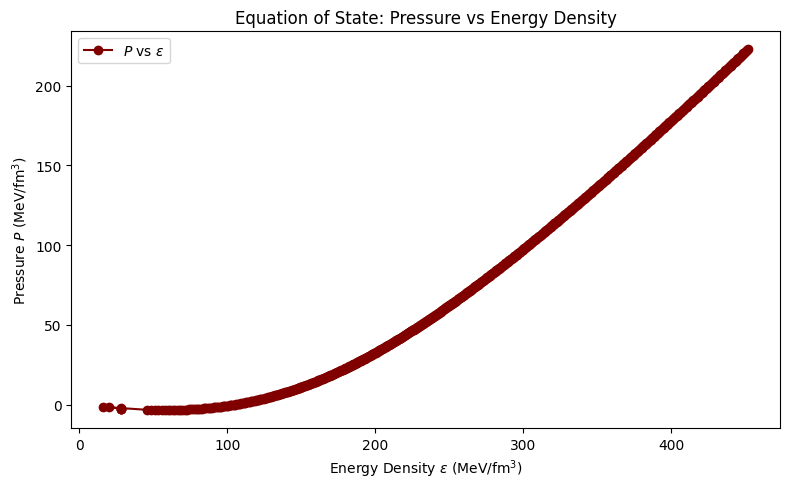

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

hbar_c = 197.327  
pi = np.pi

TM1_parametrization = False  
if TM1_parametrization == True:
    # B_E = -16.3       
    # K = 281.0         
    # M^*_N = 0.65 M_N
    m_N = 939.0         
    m_sigma = 511.198    
    m_omega = 783.0     
    g_sigma = 10.0289   
    g_omega = 12.6139   
    n_sat = 0.145       
    gamma_i = 4.0       
else:
    m_N = 939.0         
    m_sigma = 550     
    m_omega = 783.0     
    g_sigma = 10.0289   
    g_omega = 12.6139   
    n_sat = 0.16        
    gamma_i = 4.0       

def fermi_momentum(mu_B, m_eff, omega):
    mu_eff = mu_B - g_omega * omega
    if mu_eff <= m_eff:  
        print("Warning: Effective chemical potential is less than or equal to effective mass.",mu_B)
        return 0.0  
    return np.sqrt(mu_eff**2 - m_eff**2)

def scalar_density(k_F, m_eff):
    term_1 = gamma_i * m_eff / (4 * pi**2)
    term_2 = k_F * np.sqrt(k_F**2 + m_eff**2)
    term_3 = m_eff**2 * np.log((k_F + np.sqrt(k_F**2 + m_eff**2)) / m_eff)
    return term_1 * (term_2 - term_3)

def baryon_density(k_F):
    return (gamma_i * k_F**3) / (6 * pi**2)

def field_equations(x, mu_B):
    sigma, omega = x

    m_eff = m_N - g_sigma * sigma

    k_F = fermi_momentum(mu_B, m_eff, omega)

    n_B = baryon_density(k_F)

    n_s = scalar_density(k_F, m_eff)

    eq1 = sigma - (g_sigma / m_sigma**2) * n_s

    eq2 = omega - (g_omega / m_omega**2) * n_B

    return [eq1, eq2]

from scipy.optimize import fsolve

def solve_walecka(mu_B):
    if TM1_parametrization == True:
        sol = fsolve(field_equations, [20.0, 14.0], args=(mu_B,))
    else:
        sol = fsolve(field_equations, [20.0, 10.0], args=(mu_B,))

    sigma, omega = sol

    m_eff = m_N - g_sigma * sigma

    k_F = fermi_momentum(mu_B, m_eff, omega)

    n_B = baryon_density(k_F)

    return {
        'mu_B': mu_B,
        'k_F': k_F,
        'n_B': n_B,
        'm_eff': m_eff,
        'sigma': sigma,
        'omega': omega,
    }

mu_B_values = np.arange(922, 1601, 1)

results = [solve_walecka(mu_B) for mu_B in mu_B_values]

n_B_vals = [res['n_B'] / hbar_c**3 for res in results]

m_eff_vals = [res['m_eff'] for res in results]

sigma = [res['sigma'] for res in results]

omega = [res['omega'] for res in results]


n_B_array = np.array(n_B_vals)
plt.plot(n_B_array / n_sat , sigma, label=r"$\sigma$ vs $n_B$", marker='o', linestyle='-')
plt.plot(n_B_array / n_sat  , omega, label=r"$\omega$ vs $n_B$", marker='s', linestyle='--')
plt.xlabel(r"$n_B/n_{\rm sat}$")
plt.ylabel(r"Mean-fields [MeV]")
plt.title("Meson Mean-fields vs Baryon Density in Symmetric Nuclear Matter")
plt.legend()
plt.tight_layout()
plt.savefig('Mean fields vs baryon density_1')
plt.show()


plt.plot(mu_B_values, sigma, label=r"$\sigma$ vs $\mu_B$", marker='o', linestyle='-')
plt.plot(mu_B_values, omega, label=r"$\omega$ vs $\mu_B$", marker='s', linestyle='--')
plt.xlabel(r"$\mu_B$ [MeV]")
plt.ylabel(r"Mean-fields [MeV]")
plt.title("Meson Mean-fields vs Baryon Chemical Potetnial in Symmetric Nuclear Matter")
plt.legend()
plt.tight_layout()
plt.savefig('mean fields vs baryon chemical potential_1')
plt.show()


n_B_array = np.array(n_B_vals)
plt.plot(n_B_array / n_sat, m_eff_vals, label=r"$M^*$ vs $n_B$", marker='o', linestyle='-')
plt.xlabel(r"$n_B/n_{\rm sat}$")
plt.ylabel(r"$M^*$ [MeV]")
plt.title("Effective Mass of Nucleons vs Baryon Density in Symmetric Nuclear Matter")
plt.legend()
plt.tight_layout()
plt.savefig('Effective mass vs baryon density_1')
plt.show()


n_B_array = np.array(n_B_vals)
plt.plot(mu_B_values, m_eff_vals, label=r"$M^*$ vs $\mu_B$", marker='o', linestyle='-')
plt.xlabel(r"$\mu_B$ [MeV]")
plt.ylabel(r"$M^*$ [MeV]")
plt.title("Effective Mass of Nucleons vs Baryon Chemical Potential in Symmetric Nuclear Matter")
plt.legend()
plt.tight_layout()
plt.savefig('Effective mass vs Baryon Chemical Potential_1')
plt.show()


from numpy import sqrt, log, pi
def energy_density(k_F, m_eff, sigma, omega, m_sigma, m_omega, gamma=4):
    E_F = sqrt(k_F**2 + m_eff**2)
    kinetic = (gamma / (16 * pi**2)) * (
        k_F * E_F * (2 * k_F**2 + m_eff**2) +
        m_eff**4 * log((k_F + E_F) / m_eff)
    )
    meson = 0.5 * m_sigma**2 * sigma**2 + 0.5 * m_omega**2 * omega**2
    return kinetic + meson

def pressure(k_F, m_eff, sigma, omega, m_sigma, m_omega, gamma=4):
    E_F = sqrt(k_F**2 + m_eff**2)
    kinetic = (gamma / (24 * pi**2)) * (
        k_F * E_F * (k_F**2 - 1.5 * m_eff**2) +
        1.5 * m_eff**4 * log((k_F + E_F) / m_eff)
    )
    meson = -0.5 * m_sigma**2 * sigma**2 + 0.5 * m_omega**2 * omega**2
    return kinetic + meson

gamma = 4  

energy_density_vals = []
pressure_vals = []

for i in range(len(n_B_vals)):
    k_F = (3 * pi**2 * n_B_vals[i] / 2)**(1/3)
    
    m_eff = m_eff_vals[i]
    sig = sigma[i]
    omg = omega[i]

    E_F = np.sqrt(k_F**2 + m_eff**2)

    kinetic_energy = (gamma / (16 * pi**2)) * (
        k_F * E_F * (2 * k_F**2 + m_eff**2) +
        m_eff**4 * np.log((k_F + E_F) / m_eff)
    )
    meson_energy = 0.5 * m_sigma**2 * sig**2 + 0.5 * m_omega**2 * omg**2
    energy_density_vals.append((kinetic_energy + meson_energy) / hbar_c**3)

    kinetic_pressure = (gamma / (24 * pi**2)) * (
        k_F * E_F * (k_F**2 - 1.5 * m_eff**2) +
        1.5 * m_eff**4 * np.log((k_F + E_F) / m_eff)
    )
    meson_pressure = -0.5 * m_sigma**2 * sig**2 + 0.5 * m_omega**2 * omg**2
    pressure_vals.append((kinetic_pressure + meson_pressure) / hbar_c**3)

plt.figure(figsize=(8, 5))
plt.plot(mu_B_values, energy_density_vals, label=r'$\varepsilon$ vs $\mu_B$', color='darkred', marker='o')
plt.xlabel(r'Baryon Chemical Potential $\mu_B$ (MeV)')
plt.ylabel(r'Energy Density $\varepsilon$ (MeV/fm$^3$)')
plt.title('Energy Density vs Baryon Chemical Potential')
plt.legend()
plt.tight_layout()
plt.savefig('Energy Density vs Baryon Chemical Potential_1')
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(mu_B_values, pressure_vals, label=r'$P$ vs $\mu_B$', color='darkblue', marker='s')
plt.xlabel(r'Baryon Chemical Potential $\mu_B$ (MeV)')
plt.ylabel(r'Pressure $P$ (MeV/fm$^3$)')
plt.title('Pressure vs Baryon Chemical Potential')
plt.legend()
plt.tight_layout()
plt.savefig('Pressure vs Baryon Chemical Potential_1')
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(energy_density_vals, pressure_vals, label=r'$P$ vs $\varepsilon$', color='maroon', marker='o')
plt.xlabel(r'Energy Density $\varepsilon$ (MeV/fm$^3$)')
plt.ylabel(r'Pressure $P$ (MeV/fm$^3$)')
plt.title('Equation of State: Pressure vs Energy Density')
plt.legend()
plt.tight_layout()
plt.savefig('Pressure vs Energy Density (EoS)_1')
plt.show()



data_dict = {
    'mu_B [MeV]': mu_B_values,
    'Energy Density [MeV/fm^3]': energy_density_vals,
    'Pressure [MeV/fm^3]': pressure_vals
}

df_output = pd.DataFrame(data_dict)
df_output.to_csv('walecka_output_eos_1.txt', sep=' ', index=False, header=True)
df_output.to_csv('walecka_output_1.csv', index=False)

